<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics_private/blob/master/week3%20-%20EDA%20and%20Visualization/Exercises/Exercise1_week3_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EDA and data visualization

## Exercises

In this exercise you're going to follow the walkthroughs seen before and creat the same types of charts.<br>
Thoses chart will help you to answer questions.

For this, we're going to use another data-set that we used in the walkthroughs.<br>



## 1. Imports, data set and cleaning

###1.1 Imports

In [0]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

###1.2 Load the data-set

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###1.2 Cleaning the NaN value

In [0]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
data.shape

(7043, 21)

In [0]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
#data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

##2. Pie chart
**question:**
"What is the proportion of Female in the dataframe ?"

Text(0, 0.5, '')

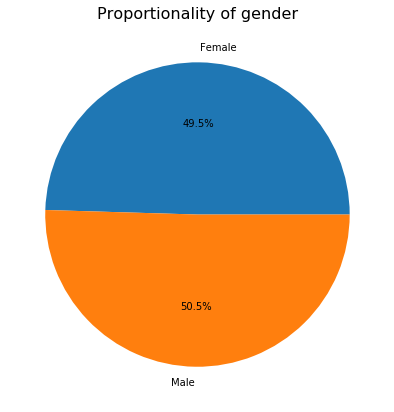

In [0]:
data_pie = data.groupby(["gender"])["customerID"].count()
ax = data_pie.plot(kind="pie", figsize=(7,7), autopct="%1.1f%%")
ax.set_title("Proportionality of gender", size=16)
ax.set_ylabel("")

##3. Barplot

**question:** "How many women are in the dataframe ?"


Text(0, 0.5, 'number of people')

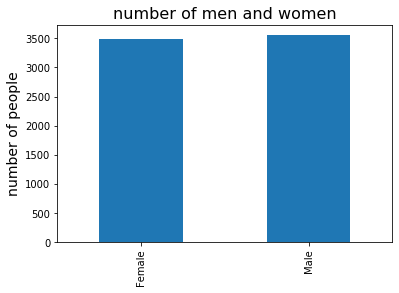

In [0]:
data_bar = data.groupby(["gender"])["customerID"].count()
ax = data_bar.plot(kind="bar") #"bar" vertical ploting
ax.set_title("number of men and women", size=16)
ax.set_xlabel("", size=14)
ax.set_ylabel("number of people", size=14)

**Horizontally**

Text(0, 0.5, '')

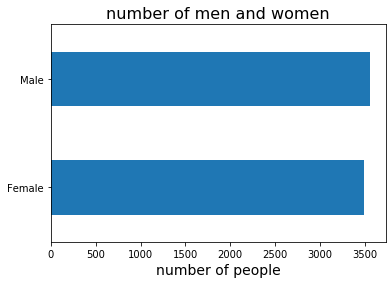

In [0]:
#data_bar = data.groupby(["gender"])["customerID"].count()
ax = data_bar.plot(kind="barh") #something a little different here ;)
ax.set_title("number of men and women", size=16)
ax.set_xlabel("number of people", size=14)
ax.set_ylabel("", size=14)

##4. Barplot using Seaborn
**question:** "Which payement methode is the most represented  ?"<br>


<Figure size 720x504 with 0 Axes>

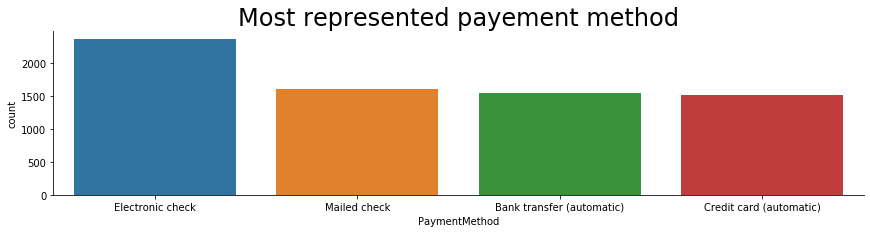

In [0]:
listeOrder = data.groupby(["PaymentMethod"])["customerID"].nunique().sort_values(ascending=False).index.tolist() #give us a list with: a count of the number of customerID by payement methodes. This list is sorted "descending" 
fig = plt.gcf() #the aera of the plt figure
fig.set_size_inches(10, 7) #resize the figure
sns.catplot(kind="count", data=data, x="PaymentMethod", height=3, aspect=4, order=listeOrder[:20] ) #The ploting and the selection are here !
plt.title("Most represented payement method",fontsize=24) #title configuration
plt.show() 

##5. Boxplot

**question:** "What are the mean, median, min and the value of the third quartile of the `MonthlyCharges`  ?"<br>


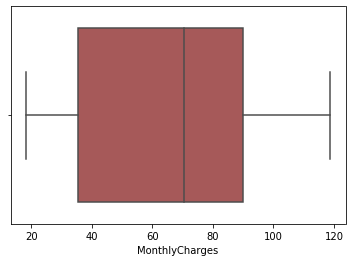

In [0]:
sns.boxplot(x=data["MonthlyCharges"],color="r", saturation=0.3)

In [0]:
data["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

## 6. Scatter Plot and lines


### 6.1 Scatter plot
**question:** "Is there a correlation between the `MonthlyCharges` and the `TotalCharges` ?"

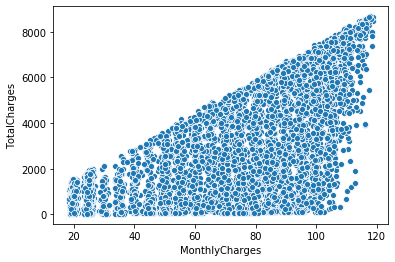

In [0]:
sns.scatterplot(x=data["MonthlyCharges"], y=data["TotalCharges"])

## Pair Grid or "how to find correlations ?"
**question:** "could you find any correlation between one of those values: " `tenure`, `MonthlyCharges`, `TotalCharges` ?"

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:98: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f9d7a9c64a8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


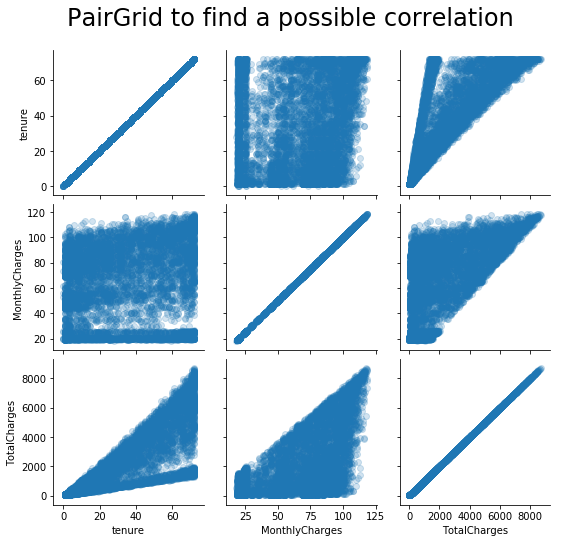

In [0]:
g = sns.PairGrid(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'],
                 palette='pale red')
g.map(plt.scatter, alpha=0.2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PairGrid to find a possible correlation', size=24)
g.add_legend();